In [83]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import uuid
from ipynb.fs.defs.normalize_and_segment import normalize_and_segment
from utils import *
import torch, torchvision
import shutil

ebftr


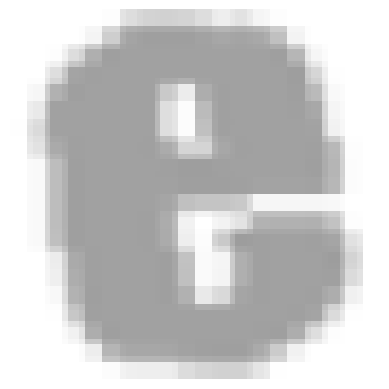

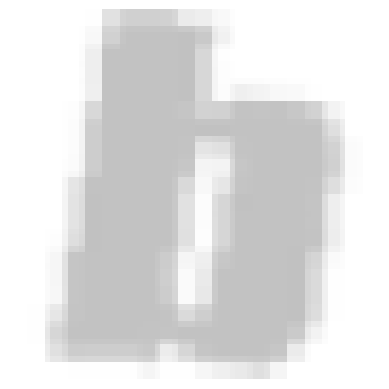

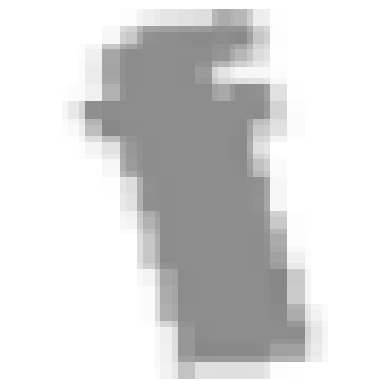

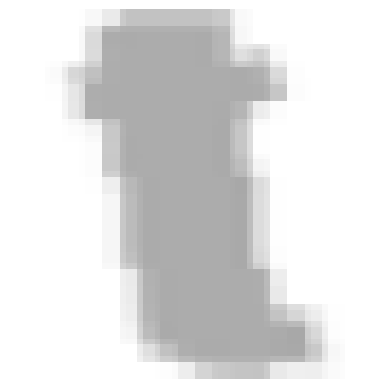

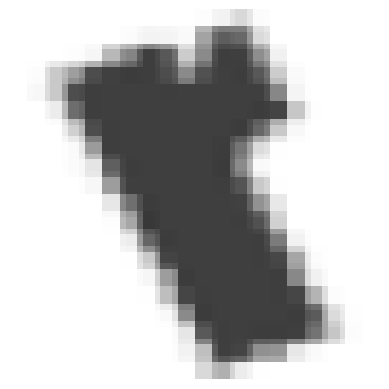

In [35]:
img, label = get_rand_img()
print(label)
for char in normalize_and_segment(img):
    show_img(char)


In [92]:
def segment_captcha_into_characters(input_dir, output_dir):
    if os.path.exists(output_dir):
        shutil.rmtree(output_dir)
    os.makedirs(output_dir, exist_ok=True)
    
    path_ext = "-0.png"
    files = [
        f for f in os.listdir(input_dir)
        if f.lower().endswith(path_ext)
    ]

    segment_fail_count = 0

    for filename in files:
        label = get_label(filename)
        img = get_img(label)
        chars = normalize_and_segment(img)

        if len(chars) != len(label):
            segment_fail_count += 1
            continue
            
        for ch, ch_img in zip(label, chars):
            # Ensure grayscale uint8
            if ch_img.dtype == bool:
                ch_img = ch_img.astype("uint8") * 255
            elif ch_img.dtype in (np.float32, np.float64):
                ch_img = (ch_img * 255).clip(0, 255).astype("uint8")
            else:
                ch_img = ch_img.astype("uint8")
            # Ensure each output is 64x64 (just in case)
            ch_img = cv2.resize(ch_img, (64, 64), interpolation=cv2.INTER_AREA)

            unique_id = uuid.uuid4().hex[:8]
            out_name = f"{ch}/{unique_id}.png"
            os.makedirs(f"{output_dir}/{ch}", exist_ok=True)
            cv2.imwrite(os.path.join(output_dir, out_name), ch_img)

    failure_rate = segment_fail_count / len(files) * 100
    print(f"Finished creating dataset: {segment_fail_count} images wrongly segmented ({failure_rate}%)")



### Process CAPTCHAs into individual characters

In [93]:
train_dir = os.getcwd() + "/../train"
data_dir = os.getcwd() + "/../dataset"
segment_captcha_into_characters(train_dir, data_dir)

Finished creating dataset: 1887 images wrongly segmented (23.593398349587396%)
